We will begin by importing numpy, pandas, scikit-learn, and pyplot. These are the libraries we will use to create our machine learning model.

In [1]:
# Import libriaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next we will read in the csv file containing the housing dataset found on kaggle.com and display the head of the data.

In [2]:
# Read in dataset from csv file and shuffle data
data =  pd.read_csv('Data/realtor-data.csv')
data = data.sample(n=len(data))
data = data.reset_index(drop=True)
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,14936.0,for_sale,239500.0,4.0,2.0,3.12,1128054.0,Benton,Kentucky,42025.0,2240.0,NaN
1,35108.0,for_sale,30000.0,NaN,NaN,1.00,1892571.0,Bradley,Maine,4411.0,NaN,NaN
2,88700.0,for_sale,165000.0,1.0,1.0,NaN,714053.0,Aurora,Colorado,80014.0,648.0,2021-11-01
3,79013.0,sold,665000.0,4.0,4.0,0.31,933332.0,Dardenne Prairie,Missouri,63368.0,4474.0,2022-03-14
4,74259.0,for_sale,581720.0,5.0,4.0,1.50,1567408.0,Halfmoon,New York,12065.0,3128.0,NaN


In [3]:
# Print max values for numerical columns
print(f"Max price: {data['price'].max()}\nMax Beds: {data['bed'].max()}\nMax Baths: {data['bath'].max()}\nMax Acres: {data['acre_lot'].max()}\nMax Square feet: {data['house_size'].max()}")

Max price: 2147483600.0
Max Beds: 473.0
Max Baths: 830.0
Max Acres: 100000.0
Max Square feet: 1040400400.0


After reading in the dataset, we need to clean our data by filtering out columns that will not be used for training, removing records that contain null data, and removing 

In [4]:
# Drop null values
data.dropna(inplace = True)

# Drop unused columns
data.drop('prev_sold_date', axis = 1, inplace = True)
data.drop('brokered_by', axis = 1, inplace = True)
data.drop('status', axis = 1, inplace = True)
data.drop('zip_code', axis = 1, inplace = True)
data.drop('street', axis = 1, inplace = True)
data.head()

,price,bed,bath,acre_lot,city,state,house_size
3,665000.0,4.0,4.0,0.31,Dardenne Prairie,Missouri,4474.0
8,580000.0,5.0,3.0,0.34,State College,Pennsylvania,2500.0
9,250000.0,3.0,2.0,5.00,Gainesville,Georgia,1382.0
15,360000.0,2.0,2.0,0.08,Yucaipa,California,1005.0
16,229900.0,2.0,2.0,0.57,Waterloo,Iowa,960.0


Now that we have our data filtered and cleaned, lets take a look at some scatterplots to get an idea of how the different categories relate to the price of the homes. Given how large our dataset is, we will take a slice of 500 houses and use those for our graphs.

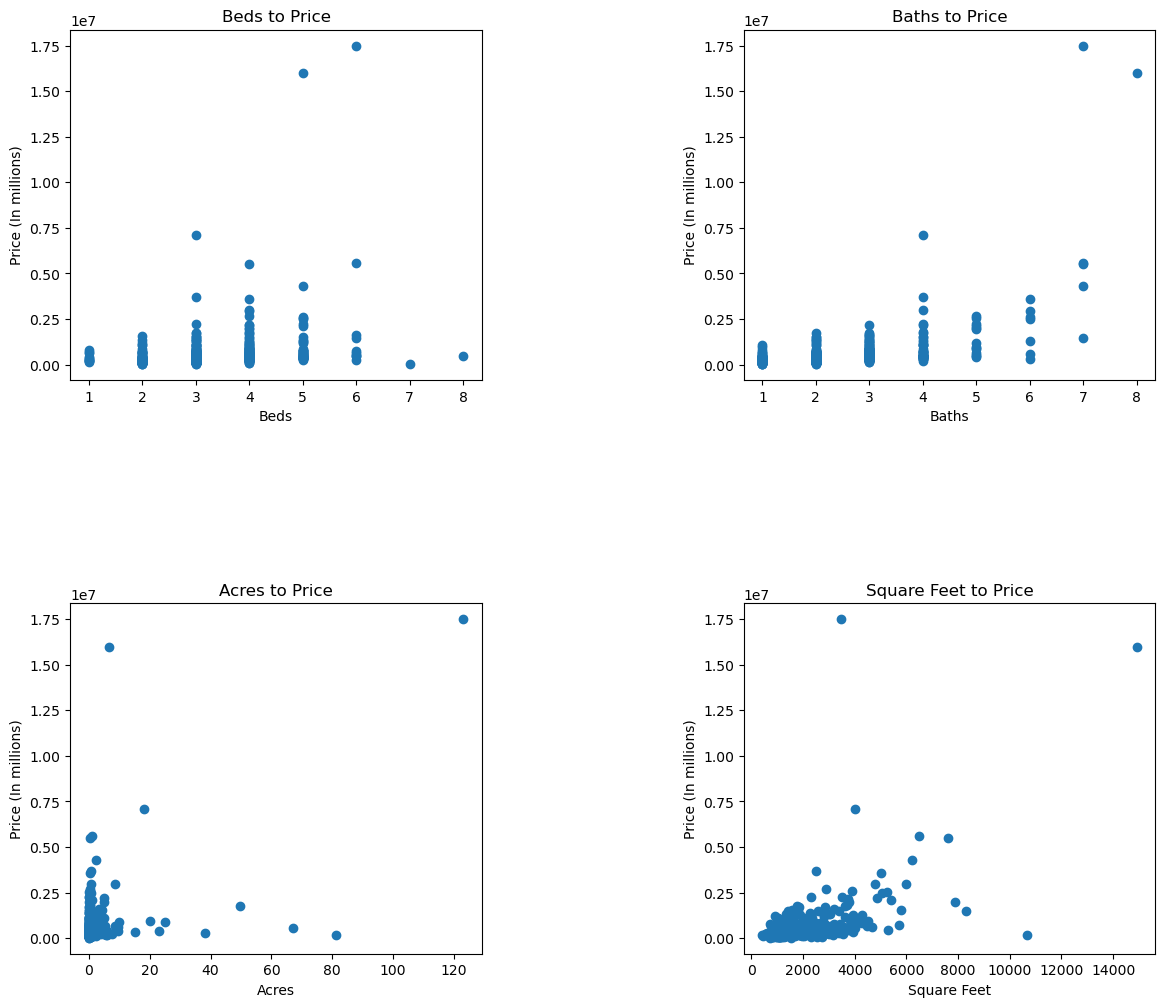

In [5]:
# Create subplots
plt.figure(figsize=(14, 12))
plot1 = plt.subplot2grid((5, 5), (0, 0), rowspan = 2, colspan = 2) 
plot2 = plt.subplot2grid((5, 5), (0, 3), rowspan = 2, colspan = 2) 
plot3 = plt.subplot2grid((5, 5), (3, 0), rowspan = 2, colspan = 2)
plot4 = plt.subplot2grid((5, 5), (3, 3), rowspan = 2, colspan = 2)

# Set price values as y
y = data['price'].iloc[:500]

# Set bed values as x1 
x1 = data['bed'].iloc[:500]
plot1.scatter(x1.to_numpy(),y.to_numpy())
plot1.set_title('Beds to Price')
plot1.set_xlabel('Beds')
plot1.set_ylabel('Price (In millions)')

# Set baths values as x2
x2 = data['bath'].iloc[:500]
plot2.scatter(x2.to_numpy(),y.to_numpy())
plot2.set_title('Baths to Price')
plot2.set_xlabel('Baths')
plot2.set_ylabel('Price (In millions)')

# Set acre values as x3 
x3 = data['acre_lot'].iloc[:500]
plot3.scatter(x3.to_numpy(),y.to_numpy())
plot3.set_title('Acres to Price')
plot3.set_xlabel('Acres')
plot3.set_ylabel('Price (In millions)')

# Set square foot values as x4
x4 = data['house_size'].iloc[:500]
plot4.scatter(x4.to_numpy(),y.to_numpy())
plot4.set_title('Square Feet to Price')
plot4.set_xlabel('Square Feet')
plot4.set_ylabel('Price (In millions)')

plt.show()

Looking at the figures above most of our variables have a linear grouping between the $100,000 to the $500,000 marks. Beds, baths, and square feet increase in price gradually as the number of beds and baths or total square footage increases. This is not the case for acreage, where most prices for acreage are clustered between the 0.1 and 10 acre marks. Looking at these plots, there are certainly some extreme outliers in every category. Let's remove those as they do not reflect the typical home.

In [16]:
# Drop outlier data
data = data.drop(data[data['price'] > 1500000].index)
data = data.drop(data[data['bed'] > 10].index)
data = data.drop(data[data['bath'] > 10].index)
data = data.drop(data[data['acre_lot'] > 100].index)
data = data.drop(data[data['acre_lot'] > 5000].index)

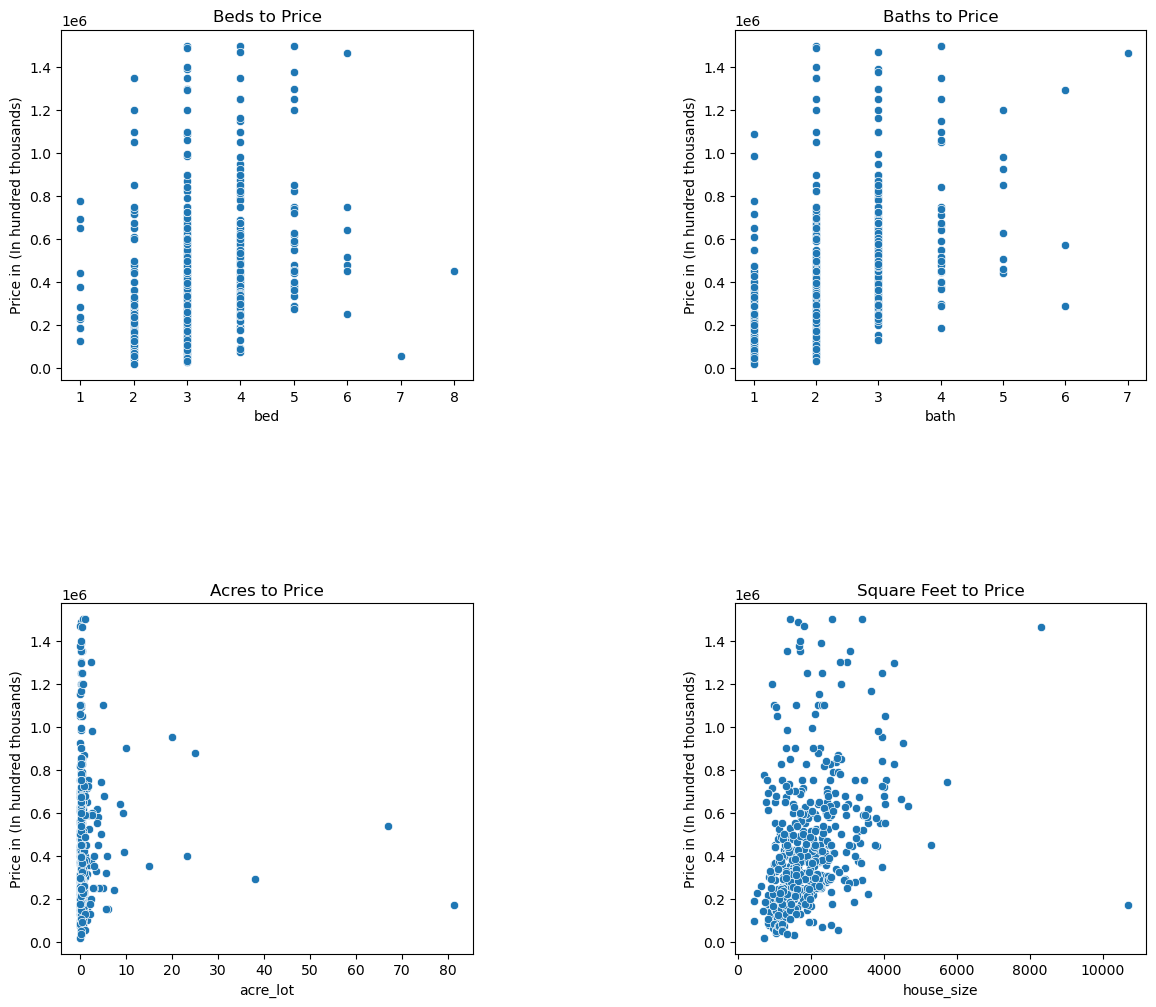

In [18]:
# Set figsize
plt.figure(figsize=(14, 12))

# Set sizes of X and y
x_plotting = data.iloc[:500]
y_plotting = data['price'].iloc[:500]

# Create scatter plot with regression line for beds
plt.subplot2grid((5, 5), (0, 0), rowspan = 2, colspan = 2) 
fig1 = sns.scatterplot(x = x_plotting['bed'],y = y_plotting)
fig1.set(ylabel = 'Price in (In hundred thousands)', title = 'Beds to Price')

# Create scatter plot with regression line for baths
plt.subplot2grid((5, 5), (0, 3), rowspan = 2, colspan = 2) 
fig2 = sns.scatterplot(x = x_plotting['bath'],y = y_plotting)
fig2.set(ylabel = 'Price in (In hundred thousands)', title = 'Baths to Price')

# Create scatter plot with regression line for acres
plot3 = plt.subplot2grid((5, 5), (3, 0), rowspan = 2, colspan = 2)
fig3 = sns.scatterplot(x = x_plotting['acre_lot'],y = y_plotting)
fig3.set(ylabel = 'Price in (In hundred thousands)', title = 'Acres to Price')

# Create scatter plot with regression line for square feet
plot4 = plt.subplot2grid((5, 5), (3, 3), rowspan = 2, colspan = 2)
fig4 = sns.scatterplot(x = x_plotting['house_size'],y = y_plotting)
fig4.set(ylabel = 'Price in (In hundred thousands)', title = 'Square Feet to Price')

plt.show()

As you can see, we still maintain some outliers however the most aggregious have been removed from the data. Next, we need to format the data in a way that is conducive to training. To do this, we need to format our categorical data to be readable by our model, in other words, the values for our cities and states cannot be strings. For our states, we will perform one-hot swapping, turning each state into its own binary column. This will allow the model to enter true or false for the value of the state rather than a string. For our cities, we will create a unique numerical code for each city.

In [19]:
# Perform one hot swapping on the states, dropping the states column
data = data.join(pd.get_dummies(data.state)).drop(['state'], axis=1)

# Replace cities with category codes
data['city'] = data['city'].astype('category').cat.codes
data.head()

AttributeError: 'DataFrame' object has no attribute 'state'

As you can see, each state has been assigned its own column with a true or false value and the cities have all been assigned their own unique numerical code. Next we will format our new city to city code dataframe.

Now that our data has been formatted properly, lets begin training our model. For this, we will use Scikit-Learn's train_test_split to shuffle our data and split it into training X and y training data sets, as well as X and y testing datasets. This will give us both a dataset to train with. To train the model, we will use Scikit-Learn's LinearRegression.

In [24]:
# Import sklearn LinearRegression and train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set seed
np.random.seed(42)

# Set X to all columns other than price and set y to price column
X = data.drop(['price'], axis=1)
y = data['price']

# Perform Train Test Split with a test size of 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Perform prediction on the test set
y_pred = model.predict(X_test)

The model is now trained, in the next cell we will score the model.

In [25]:
# Import sklearn r2_score
from sklearn.metrics import r2_score

# Perform scoring
r2_score(y_test, y_pred)

0.5027104230619333

Our trained model has a coefficient of determination of 0.5. Now lets take a look at what our predictions look like in a regression line.

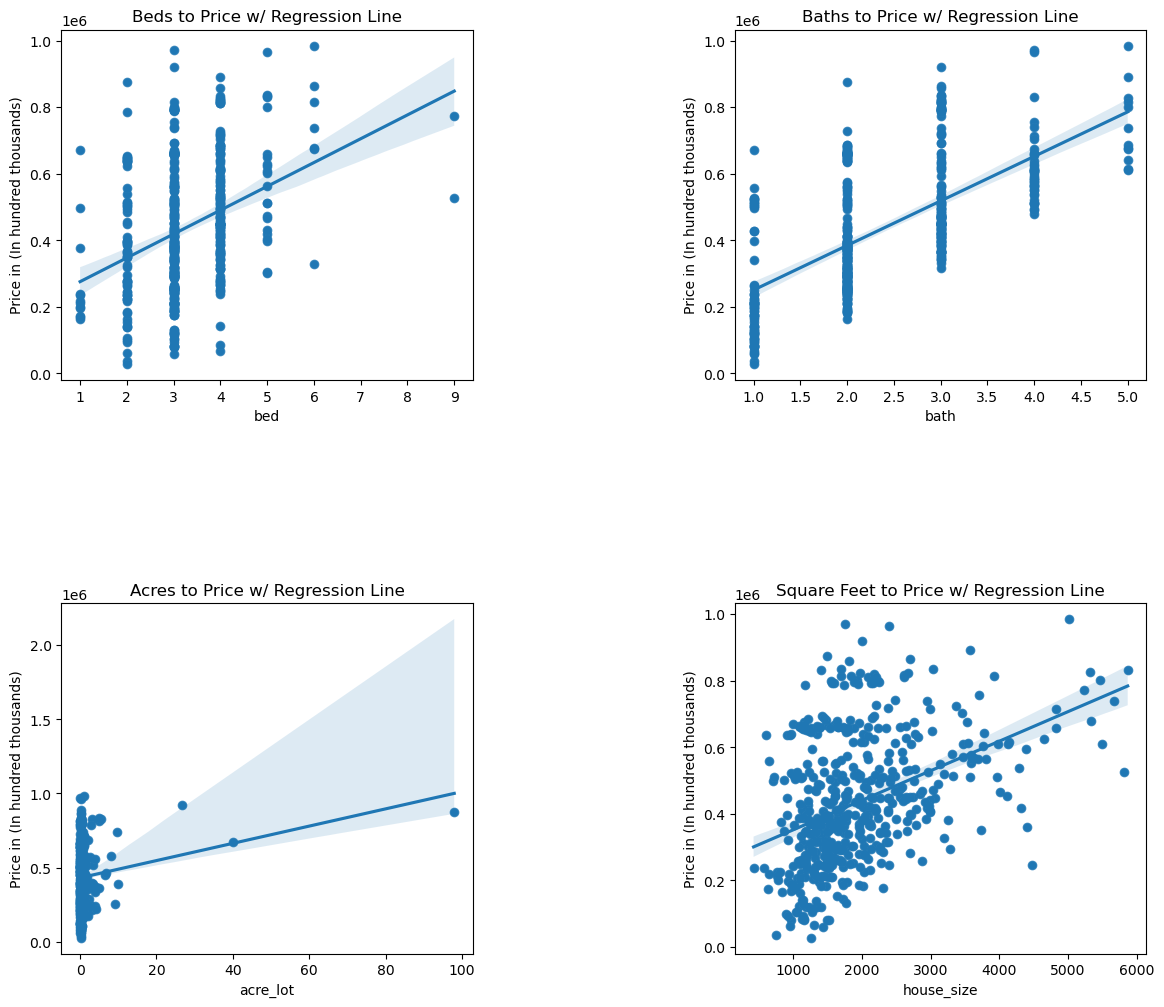

In [26]:
# Set figsize
plt.figure(figsize=(14, 12))

# Set sizes of X and y
x_plotting = X_test.iloc[:500]
y_plotting = y_pred[:500]

# Create scatter plot with regression line for beds
plt.subplot2grid((5, 5), (0, 0), rowspan = 2, colspan = 2) 
fig1 = sns.scatterplot(x = x_plotting['bed'],y = y_plotting)
fig1.set(ylabel = 'Price in (In hundred thousands)', title = 'Beds to Price w/ Regression Line')
sns.regplot(x = x_plotting['bed'],y = y_plotting)

# Create scatter plot with regression line for baths
plt.subplot2grid((5, 5), (0, 3), rowspan = 2, colspan = 2) 
fig2 = sns.scatterplot(x = x_plotting['bath'],y = y_plotting)
fig2.set(ylabel = 'Price in (In hundred thousands)', title = 'Baths to Price w/ Regression Line')
sns.regplot(x = x_plotting['bath'],y = y_plotting)

# Create scatter plot with regression line for acres
plot3 = plt.subplot2grid((5, 5), (3, 0), rowspan = 2, colspan = 2)
fig3 = sns.scatterplot(x = x_plotting['acre_lot'],y = y_plotting)
fig3.set(ylabel = 'Price in (In hundred thousands)', title = 'Acres to Price w/ Regression Line')
sns.regplot(x=x_plotting['acre_lot'],y=y_plotting)

# Create scatter plot with regression line for square feet
plot4 = plt.subplot2grid((5, 5), (3, 3), rowspan = 2, colspan = 2)
fig4 = sns.scatterplot(x = x_plotting['house_size'],y = y_plotting)
fig4.set(ylabel = 'Price in (In hundred thousands)', title = 'Square Feet to Price w/ Regression Line')
sns.regplot(x = x_plotting['house_size'],y = y_plotting)

plt.show()

As you can see, our linear regression function has done its best to fit a line to the data. There seems to be a strong correlation between the data and our predictions with the beds, baths, and square feet. Looking at the acres, however, we see a high amount of variance.

Now that our model is fully trained, lets export it with pickle so we can use it in our application.

In [15]:
# Importing pickle
import pickle

# Saving the model as realor-model.pkl
with open('realtor-model.pkl','wb') as f:
    pickle.dump(model, f)